In [1]:
#important library to show the image 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#importing numpy to work with large set of data.
import numpy as np
import skimage.io
import struct
# https://www.codespeedy.com/plot-negative-of-an-image-in-python/

In [2]:
file_name = "clue"
with open(f'{file_name}.bmp', 'rb') as bmp: 
    print('Type:', bmp.read(2).decode()) 
    print('Size: %s' % struct.unpack('I', bmp.read(4))) 
    print('Reserved 1: %s' % struct.unpack('H', bmp.read(2))) 
    print('Reserved 2: %s' % struct.unpack('H', bmp.read(2))) 
    print('Offset: %s' % struct.unpack('I', bmp.read(4))) 
    print('DIB Header Size: %s' % struct.unpack('I', bmp.read(4))) 
    print('Width: %s' % struct.unpack('I', bmp.read(4))) 
    print('Height: %s' % struct.unpack('I', bmp.read(4))) 
    print('Colour Planes: %s' % struct.unpack('H', bmp.read(2))) 
    print('Bits per Pixel: %s' % struct.unpack('H', bmp.read(2))) 
    print('Compression Method: %s' % struct.unpack('I', bmp.read(4))) 
    print('Raw Image Size: %s' % struct.unpack('I', bmp.read(4))) 
    print('Horizontal Resolution: %s' % struct.unpack('I', bmp.read(4))) 
    print('Vertical Resolution: %s' % struct.unpack('I', bmp.read(4))) 
    print('Number of Colours: %s' % struct.unpack('I', bmp.read(4))) 
    print('Important Colours: %s' % struct.unpack('I', bmp.read(4))) 

Type: BM
Size: 921656
Reserved 1: 0
Reserved 2: 0
Offset: 54
DIB Header Size: 40
Width: 640
Height: 480
Colour Planes: 1
Bits per Pixel: 24
Compression Method: 0
Raw Image Size: 921602
Horizontal Resolution: 2834
Vertical Resolution: 2834
Number of Colours: 0
Important Colours: 0


In [3]:
file_name = "clue"
path = f'{file_name}.bmp'

In [19]:
def read_rows(path):
    image_file = open(path, "rb")
    # Blindly skip the BMP header.
    image_file.seek(54)

    # We need to read pixels in as rows to later swap the order
    # since BMP stores pixels starting at the bottom left.
    rows = []
    row = []
    pixel_index = 0

    while True:
        if pixel_index == 640:
            pixel_index = 0
            rows.insert(0, row)
            if len(row) != 640 * 3:
                raise Exception("Row length is not 640*3 but " + str(len(row)) + " / 3.0 = " + str(len(row) / 3.0))
            row = []
        pixel_index += 1

        r_string = image_file.read(1)
        g_string = image_file.read(1)
        b_string = image_file.read(1)

        if len(r_string) == 0:
            # This is expected to happen when we've read everything.
            if len(rows) != 480:
                print("Warning!!! Read to the end of the file at the correct sub-pixel (red) but we've not read 1080 rows!")
            break

        if len(g_string) == 0:
            print("Warning!!! Got 0 length string for green. Breaking.")
            break

        if len(b_string) == 0:
            print("Warning!!! Got 0 length string for blue. Breaking.")
            break

        r = ord(r_string)
        g = ord(g_string)
        b = ord(b_string)

        row.append(b)
        row.append(g)
        row.append(r)

    image_file.close()

    return rows

def repack_sub_pixels(rows):
    print("Repacking pixels...")
    sub_pixels = []
    for row in rows:
        for sub_pixel in row:
            sub_pixels.append(sub_pixel)

    diff = len(sub_pixels) - 640 * 480 * 3
    print("Packed", len(sub_pixels), "sub-pixels.")
    if diff != 0:
        print("Error! Number of sub-pixels packed does not match 1920*1080: (" + str(len(sub_pixels)) + " - 1920 * 1080 * 3 = " + str(diff) +").")

    return sub_pixels

rows = read_rows(path)

# This list is raw sub-pixel values. A red image is for example (255, 0, 0, 255, 0, 0, ...).
sub_pixels = repack_sub_pixels(rows)

Warning!!! Got 0 length string for blue. Breaking.
Repacking pixels...
Packed 921600 sub-pixels.


In [20]:
sub_pixels

[255,
 0,
 0,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 2

In [21]:
array = np.array(sub_pixels, dtype=np.uint8)
array

array([255,   0,   0, ..., 255, 255, 255], dtype=uint8)

In [24]:
x = np.reshape(array, (480, 640,3))
x

array([[[255,   0,   0],
        [255,   0,   0],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255, 255, 255],
        ...,
        [255,   0,   0],
        [255, 255, 255],
        [255,   0,   0]],

       [[255, 255, 255],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255, 255, 255],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

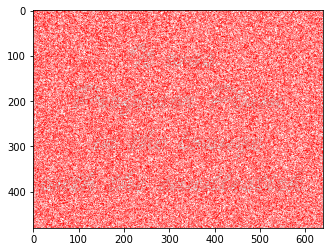

In [25]:
# imshow function with comperision of gray level value.
plt.imshow(x)
#plot the image on a plane.
plt.show()

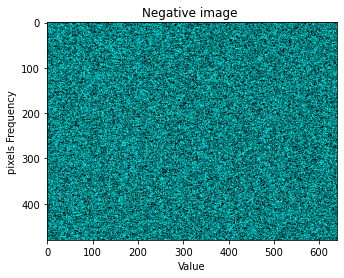

In [26]:
#convert the image into its negative value.
z=255-x
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
plt.title("Negative image ")
plt.imshow(z)
plt.show()
# plt.savefig('result.bmp')